## Wordnet Similarity

### Part - 1
   
    1. Find the top 5 occuring words(ignoring the stop words) and then find the words most similar to them. Use the extract given below.
    
    2. For any given word visualize how two words are similar

~~~~
The Supreme Court ruled last week in the case of Fane Lozman vs the City of Riviera Beach, Florida. They decided that Lozman’s 60-foot, two-story, motorless, rudderless floating home was not a boat or a vessel, and hence should not have been seized under maritime law and destroyed by the city.

With the line between house and boat a little bit clearer, reader Steve asked us to clarify something else: “What defines a boat, versus a ship?”

One of the quickest ways to reveal yourself as a landlubber is to refer to a ship as a boat, but there’s no absolute distinction between the two, and even experienced mariners rely on local custom and usage to differentiate them. 

Back in the Age of Sail, a ship was pretty well defined as a vessel with three or more square rigged masts. As different methods of power generation replaced wind and sail, the ships of old became more specifically known as “sailing ships,” and the usage of ship broadened to cover a wide, ill-defined variety of vessels. 

One thing that sets a ship apart from a boat is size. According the U.S. Naval Institute, a boat, generally speaking, is small enough to be carried aboard a larger vessel, and a vessel large enough to carry a smaller one is a ship. Or, as Steve says his Navy Lieutenant father put it to him, “You can put a boat on a ship, but you can’t put a ship on a boat.”

Now, this Naval convention is a good rule of thumb most of the time, but there are a few exceptions, among both naval and civilian vessels. Some yachts, ferries, tug boats, fishing boats, police boats, etc. can carry small lifeboats or dinghies, but they usually don’t graduate to ship status because of that. On the other hand, a large container ship or the USS Cole can be carried aboard an even bigger ship without getting demoted to a boat. 

The U.S. Navy seems to want to have it both ways with their submarines. One component of each vessel’s official name is USS—that is, United States Ship—but seamen, the Naval Institute says, usually refer to submarines in general as boats, regardless of size. 
~~~~


In [10]:
from nltk.corpus import wordnet,stopwords
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [11]:
content = """The Supreme Court ruled last week in the case of Fane Lozman vs the City of Riviera Beach, Florida. They decided that Lozman’s 60-foot, two-story, motorless, rudderless floating home was not a boat or a vessel, and hence should not have been seized under maritime law and destroyed by the city.

With the line between house and boat a little bit clearer, reader Steve asked us to clarify something else: “What defines a boat, versus a ship?”

One of the quickest ways to reveal yourself as a landlubber is to refer to a ship as a boat, but there’s no absolute distinction between the two, and even experienced mariners rely on local custom and usage to differentiate them. 

Back in the Age of Sail, a ship was pretty well defined as a vessel with three or more square rigged masts. As different methods of power generation replaced wind and sail, the ships of old became more specifically known as “sailing ships,” and the usage of ship broadened to cover a wide, ill-defined variety of vessels. 

One thing that sets a ship apart from a boat is size. According the U.S. Naval Institute, a boat, generally speaking, is small enough to be carried aboard a larger vessel, and a vessel large enough to carry a smaller one is a ship. Or, as Steve says his Navy Lieutenant father put it to him, “You can put a boat on a ship, but you can’t put a ship on a boat.”

Now, this Naval convention is a good rule of thumb most of the time, but there are a few exceptions, among both naval and civilian vessels. Some yachts, ferries, tug boats, fishing boats, police boats, etc. can carry small lifeboats or dinghies, but they usually don’t graduate to ship status because of that. On the other hand, a large container ship or the USS Cole can be carried aboard an even bigger ship without getting demoted to a boat. 

The U.S. Navy seems to want to have it both ways with their submarines. One component of each vessel’s official name is USS—that is, United States Ship—but seamen, the Naval Institute says, usually refer to submarines in general as boats, regardless of size."""

In [12]:
content = re.sub(r'\,|\.|\:|\;|\"|\?' , "" , content)

In [13]:
content = content.lower()

In [14]:
content

'the supreme court ruled last week in the case of fane lozman vs the city of riviera beach florida they decided that lozman’s 60-foot two-story motorless rudderless floating home was not a boat or a vessel and hence should not have been seized under maritime law and destroyed by the city\n\nwith the line between house and boat a little bit clearer reader steve asked us to clarify something else “what defines a boat versus a ship”\n\none of the quickest ways to reveal yourself as a landlubber is to refer to a ship as a boat but there’s no absolute distinction between the two and even experienced mariners rely on local custom and usage to differentiate them \n\nback in the age of sail a ship was pretty well defined as a vessel with three or more square rigged masts as different methods of power generation replaced wind and sail the ships of old became more specifically known as “sailing ships” and the usage of ship broadened to cover a wide ill-defined variety of vessels \n\none thing th

In [15]:
wl = WordNetLemmatizer()

In [16]:
words = word_tokenize(content)
for i in range(len(words)):
    words[i] = wl.lemmatize(words[i])

In [17]:
filtered_words = []

In [18]:
stopwords1 = set(stopwords.words("english"))

In [19]:
for i in words:
    if i not in stopwords1:
        filtered_words.append(i)
    

In [20]:
### top 5 frequent words

In [21]:
freq_words = FreqDist(filtered_words).most_common(5)

In [22]:
freq_words

[('boat', 12), ('ship', 11), ('vessel', 6), ('naval', 4), ('one', 4)]

In [23]:
f1 = []

In [24]:
for c in range(len(freq_words)):
    f1.append(freq_words[c][0])

In [25]:
filtered_words = set(filtered_words)

### Removing 5 most frequent words

In [26]:
filtered_words1 = []

In [27]:
for words in filtered_words:
    if words not in f1:
        filtered_words1.append(words)
    

### Making synsets of article words

In [28]:
w2 = []

In [29]:
w2_dict = {}

In [30]:
for w in filtered_words1:
    tmp = wordnet.synsets(w)
    if(len(tmp)>0):
        w2.append(tmp[0])
        w2_dict.update({tmp[0]:w})

In [31]:
w2_dict

{Synset('aboard.r.01'): 'aboard',
 Synset('absolute.n.01'): 'absolute',
 Synset('acquiring.n.01'): 'getting',
 Synset('adrift.s.01'): 'rudderless',
 Synset('age.n.01'): 'age',
 Synset('alumnus.n.01'): 'graduate',
 Synset('apart.s.01'): 'apart',
 Synset('ask.v.01'): 'asked',
 Synset('assortment.n.01'): 'variety',
 Synset('back.n.01'): 'back',
 Synset('beach.n.01'): 'beach',
 Synset('become.v.01'): 'became',
 Synset('bigger.s.01'): 'larger',
 Synset('broaden.v.01'): 'broadened',
 Synset('by_and_large.r.01'): 'generally',
 Synset('careless.s.03'): 'regardless',
 Synset('carry.n.01'): 'carry',
 Synset('case.n.01'): 'case',
 Synset('city.n.01'): 'city',
 Synset('civilian.n.01'): 'civilian',
 Synset('clarify.v.01'): 'clarify',
 Synset('clear.a.01'): 'clearer',
 Synset('coevals.n.01'): 'generation',
 Synset('component.n.01'): 'component',
 Synset('container.n.01'): 'container',
 Synset('convention.n.01'): 'convention',
 Synset('court.n.01'): 'court',
 Synset('custom.n.01'): 'custom',
 Synset(

### Making synsets of frequent words

In [32]:
w1 = []

In [33]:
f1

['boat', 'ship', 'vessel', 'naval', 'one']

In [34]:
for w in f1:
    tmp = wordnet.synsets(w)
    if(len(tmp)>0):
        w1.append(tmp[0])

In [35]:
max = np.zeros((len(w1)))

In [36]:
closest_word = ['<NOTHING>','<NOTHING>','<NOTHING>','<NOTHING>','<NOTHING>']

In [37]:
for i in range(len(w1)):
    for j in range(len(w2)):
        try : 
            if(max[i] < w1[i].wup_similarity(w2[j])):
                max[i] = w1[i].wup_similarity(w2[j])
                closest_word[i] = w2_dict[w2[j]]
        except Exception :
                c=0         

### most frequent words

In [38]:
f1

['boat', 'ship', 'vessel', 'naval', 'one']

### Their respective closest word in article

In [39]:
closest_word

['ferry', 'yacht', 'small', '<NOTHING>', 'two']

### extent of similarity

In [40]:
max

array([ 0.95652174,  0.90909091,  0.71428571,  0.        ,  0.875     ])

## Visualization

#### Real word in article

[('boat.n.01', {}), ('conveyance.n.03', {}), ('artifact.n.01', {}), ('craft.n.02', {}), ('object.n.01', {}), ('vehicle.n.01', {}), ('vessel.n.02', {}), ('physical_entity.n.01', {}), ('whole.n.02', {}), ('instrumentality.n.03', {}), ('entity.n.01', {})]


/home/user/stackRoute/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/user/stackRoute/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/user/stackRoute/lib/python3.5/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/user/stackRoute/lib/python3.5/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is de

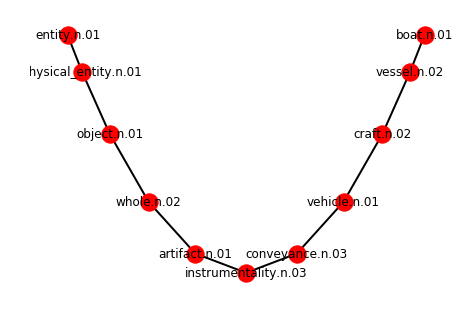

In [45]:
a = wordnet.synsets(f1[0])
G1 = nx.Graph()
prev = None
for h in reversed(a[0].hypernym_paths()[0]):
    G1.add_node(h.name())
    if prev != None:
        G1.add_edge(prev, h.name())
    prev = h.name()

print (G1.nodes(data=True))

nx.draw(G1, nx.spectral_layout(G1), width=2, with_labels=True, hold=False)
plt.show()

#### its predicted closest word 

[('conveyance.n.03', {}), ('artifact.n.01', {}), ('ferry.n.01', {}), ('vehicle.n.01', {}), ('object.n.01', {}), ('entity.n.01', {}), ('boat.n.01', {}), ('vessel.n.02', {}), ('craft.n.02', {}), ('physical_entity.n.01', {}), ('whole.n.02', {}), ('instrumentality.n.03', {})]


/home/user/stackRoute/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/user/stackRoute/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/user/stackRoute/lib/python3.5/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/user/stackRoute/lib/python3.5/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is de

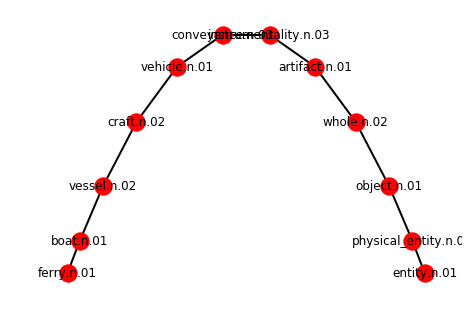

In [43]:
G2 = nx.Graph()
a = wordnet.synsets(closest_word[0])

prev = None
for h in reversed(a[0].hypernym_paths()[0]):
    G2.add_node(h.name())
    if prev != None:
        G2.add_edge(prev, h.name())
    prev = h.name()

print (G2.nodes(data=True))

nx.draw(G2, nx.spectral_layout(G2), width=2, with_labels=True, hold=False)
plt.show()